# Problem 1

### Getting familiar with loading, visualizing and operating on multivariate data

A Hess diagram is a 2D plot coded by a third quantity.

Here's an example from the [astroML documentation](https://www.astroml.org/examples/datasets/plot_SDSS_SSPP.html) showing the temperature and surface gravity (how strongly the star would pull on you if you could stand on it's surface, including the effect of rotation), color coded on the left by density, and on the right by metallicity (measured here as the ratio of iron to hydrogen) with density contours.


<img src="https://www.astroml.org/_images/plot_SDSS_SSPP_1.png">

From http://das.sdss.org/va/stripe_82_variability/SDSS_82_public/, download eight HLC\*fits.gz files (and recall how you can use `astropy.io.fits` to load these)

The HLC files are each different bands on the sky.

For each HLC file, separate stars and galaxies by using the `MEAN_OBJECT_TYPE` column and making a cut with value > 5 to find stars.

For each HLC file, and separately for stars and galaxies make a 3-panel plot.

In the left plot show `r` vs `g-i` color coded by density (recall we did this with `seaborn`'s `jointplot`, but you can use whatever).

Estimate a bivariate distribution for `density(r, g-i)` this sample (recall we did with `seaborn`'s `jointplot` use `kde`, but you can use whatever).

In the middle and right panel, again plot `r` vs `g-i`, but now color-coded by proper motion in RA, and Dec. Overlay the density contors.

Comment on the structure in stars vs galaxies, and the evolution with position on the sky in each HLC.


In [13]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from astropy.io import fits

hdul = fits.open('../../../data/HLC.RA_00_to_01.fits.gz')
data = hdul[1].data

hdul.close()

ValueError: Big-endian buffer not supported on little-endian compiler

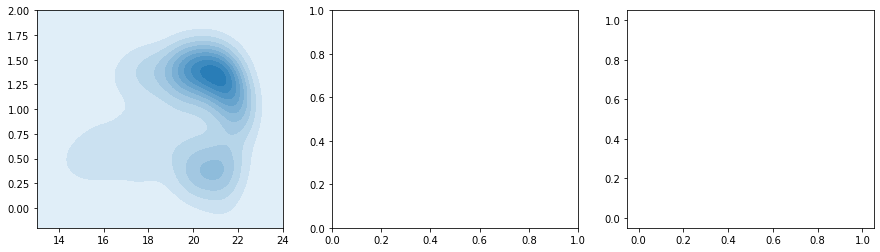

In [140]:

obj_type = data['MEAN_OBJECT_TYPE']
stars    = data[obj_type>5][::100]
stars_i  = stars['MEAN_PSFMAG'][:,2]
stars_gi = stars['MEAN_PSFMAG'][:,1] - stars['MEAN_PSFMAG'][:,2]


fig, axs = plt.subplots(1,3, figsize=(15, 4))


sns.kdeplot(data=stars_i, data2=stars_gi, ax=axs[0], \
            clip=[[13,24],[-0.2,2.]],  shade=True)

axs[1] = sns.scatterplot(x=stars_i, y=stars_gi, linewidth=0,)

sns.kdeplot(data=stars_i, data2=stars_gi, ax=axs[1], \
            clip=[[13,24],[-0.2,2.]])
sns.kdeplot(data=stars_i, data2=stars_gi, ax=axs[2], \
            clip=[[13,24],[-0.2,2.]])



plt.show()


array([22.191387, 21.973814, 20.082428, ..., 22.18928 , 22.246826,
       20.412815], dtype=float32)

# Problem 2

### Comparing distributions to a standard normal distribution

Load the `IntroStat_demo.csv` file in the data directory (use `pandas` or `astropy` or whatever you like).

Estimate the sample mean and variance of the suspiciously named `mag.outlier` column.

Make a Q-Q plot of the `mag.outlier` column and over plot a line with `Y = Mean + Sigma*X` on it. 

Calculate the values of the first and third quartiles, and use some linear algebra to figure out the equation of a line passing through them (google line 2 point form if you need a refresher on the linear algebra)

Overplot that line passing through the data.

Now try the same thing with `mag.het`. Describe what you found?

What happens if you rescale the data? Subtract of the sample mean of `mag.het` and divide by `mag.het.error`. Now repeat the Q-Q plot with this quantity. 

Describe what's going on.

In [107]:
df = pd.read_csv ('../../data/01/IntroStat_demo.csv')
#print (df)

## 2.a Q-Q plot of the mag.outlier

In [108]:
samp = df['mag.outlier']

samp_mean = samp.mean()
samp_std  = samp.std()

print("The mean of the sample is: \t%.3f"%samp_mean)
print("The variance of the sample is: \t%.3f"%samp_std)

The mean of the sample is: 	18.561
The variance of the sample is: 	0.072


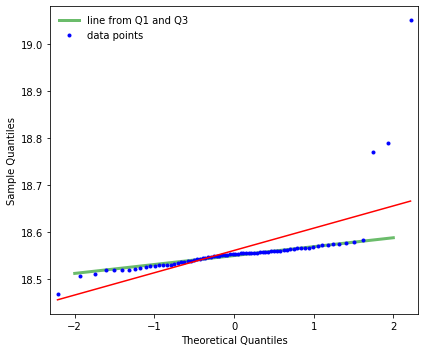

In [109]:
import scipy.stats as st
import statsmodels.api as sm


fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(1,1,1)


Q1 = np.percentile(samp, 25)
Q3 = np.percentile(samp, 75)

Q1x = -0.674490
Q3x = 0.674490

linex = np.linspace(-2,2,201)
liney = (linex-Q1x)*(Q3-Q1)/(Q3x-Q1x)+Q1

plt.plot(linex, liney, c='C2', lw=3, alpha=0.7, label='line from Q1 and Q3')
sm.qqplot(samp, line='r', ax=ax, marker=".", label='data points')

ax.legend(frameon=False)

plt.tight_layout()
plt.show()

## 2.b Q-Q plot of the mag.het

In [111]:
samp2 = df['mag.het']


samp2_mean = samp2.mean()
samp2_std  = samp2.std()

print("The mean of the sample is: \t%.3f"%samp2_mean)
print("The variance of the sample is: \t%.3f"%samp2_std)

The mean of the sample is: 	18.548
The variance of the sample is: 	0.046


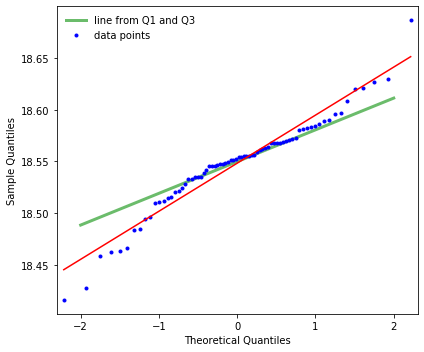

In [112]:
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(1,1,1)

Q1 = np.percentile(samp2, 25)
Q3 = np.percentile(samp2, 75)

Q1x = -0.674490
Q3x = 0.674490

linex = np.linspace(-2,2,201)
liney = (linex-Q1x)*(Q3-Q1)/(Q3x-Q1x)+Q1

plt.plot(linex, liney, c='C2', lw=3, alpha=0.7, label='line from Q1 and Q3')
sm.qqplot(samp2, line='r', ax=ax, marker=".", label='data points')

ax.legend(frameon=False)

plt.tight_layout()
plt.show()

What I found is that the first and third quartiles can roughly describe the distribution of the data, but it is not as good as qq plot.

[]

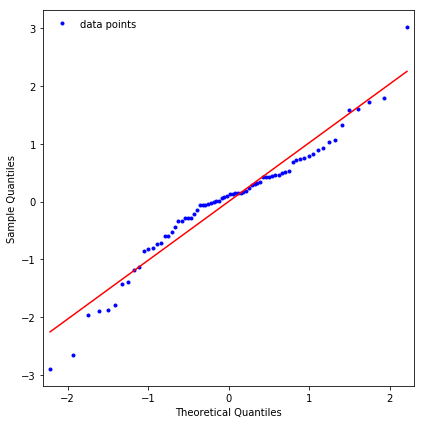

In [66]:
samp3 = (samp2-samp2_mean)/samp2_std


fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1,1,1)

sm.qqplot(samp3, line='r', ax=ax, marker=".", label='data points')
ax.legend(frameon=False)

plt.tight_layout()
plt.plot()

After the scaling we can see that the sample quantiles have been reduced to the theoretical quantiles.

# Problem 3

The demo data set for this part is the Wesenheit index of the OGLE-III fundamental-mode and first overtone classical Cepheids. 

These stars are awesome because you can use them to measure distances. Here's a nice [youtube video](https://www.youtube.com/watch?v=iyisAjHdhas) on these stars.

You'll try to estimate their period-luminosity relationship. 

The Wesenheit index is defined as `W = I - 1.55(V - I)`, and its main advantage over using simply the I or V photometry is that it is insensitive to extinction. It is denoted by 'W' among the data columns. 

Other columns are 'name', the identifier of the star; 'RA0' (in decimal hours) and 'Decl0' (in decimal degrees), celestial coordinates; 'Mode', the mode of the Cepheid ('F' indicates fundamental-mode, '1' indicates first overtone star); 'Cloud', indicating which Magellanic Cloud the star belongs to; 'logP1', the base-10 logarithm of the period in days; 'VI', the colour V-I.


Split the data into LMC and SMC, and then again by mode F and 1, and plot the `W` on the y-axis vs `log(P1)` on x.
Fit or estimate straight lines to each of the four samples (you can use `statsmodels` `astropy` `scipy` `numpy`....)
(Yes, we've not covered fitting straight lines. That's OK.)

Compute the residuals of each sample to it's respective line. Do these residuals look like a normal distribution? If not, speculate on why (WATCH THE YOUTUBE VIDEO!)

Plot the residuals color coded by if they are positive or negative vs RA and Dec (just like a Hess diagram in Problem 1).

Finally, plot the residuals against the fitted `W` values, and just to anticipate the next homework assignment, also plot `log(P1) vs V-I`. Comment on what you are seeing.

In [75]:
cep_df = pd.read_csv ('../../data/01/Cepheids.csv')

lmc  = cep_df[cep_df['Cloud']=='LMC']
smc  = cep_df[cep_df['Cloud']=='SMC']

lmc_f = lmc[lmc['Mode']=='F']
lmc_1 = lmc[lmc['Mode']=='1']

smc_f = smc[smc['Mode']=='F']
smc_1 = smc[smc['Mode']=='1']


In [76]:
cep_df

,name,RA0,Decl0,Mode,Cloud,W,logP1,VI
0,OGLE-LMC-CEP-0002,4.529733,-69.819330,F,LMC,14.52500,0.493893,0.740
1,OGLE-LMC-CEP-0005,4.592089,-69.734970,F,LMC,13.49540,0.749122,0.752
2,OGLE-LMC-CEP-0012,4.630203,-67.214420,F,LMC,14.54210,0.424912,0.598
3,OGLE-LMC-CEP-0016,4.642367,-67.646310,F,LMC,12.03300,1.021456,1.080
4,OGLE-LMC-CEP-0017,4.649119,-69.688390,F,LMC,14.34215,0.565524,0.647
...,...,...,...,...,...,...,...,...
7264,OGLE-SMC-CEP-4622,1.404808,-73.269361,1,SMC,15.94460,0.141140,0.648
7265,OGLE-SMC-CEP-4624,1.406767,-74.192639,1,SMC,15.29565,0.102449,0.577
7266,OGLE-SMC-CEP-4625,1.407181,-72.936056,1,SMC,15.33725,0.074740,0.485
7267,OGLE-SMC-CEP-4627,1.413575,-72.599167,1,SMC,14.06670,0.501477,0.686


In [49]:
data_list = [lmc_f, lmc_1, smc_f, smc_1]
titles = ['LMC, mode F', 'LMC, mode 1', 'SMC, mode F', 'SMC, mode 1']


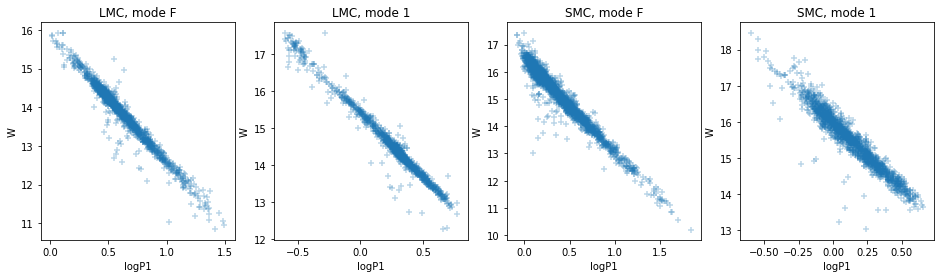

In [51]:
fig,axs = plt.subplots(1, 4, figsize=(16, 4))

for i in range(4):
    da = data_list[i]
    ax = axs[i]
    
    ax.scatter(da['logP1'], da['W'], marker='+', alpha=0.3)
    ax.set_xlabel('logP1')
    ax.set_ylabel('W')
    ax.set_title(titles[i])
    
plt.show()
    

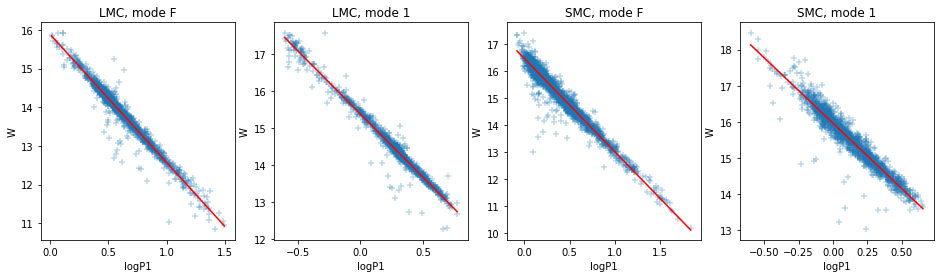

In [67]:
polys = []
res   = []

fig,axs = plt.subplots(1, 4, figsize=(16, 4))


for i in range(4):
    da = data_list[i]    
    
    p = np.polyfit(da['logP1'], da['W'], 1)
    pfunc = np.poly1d(p)
    polys.append(p)
    
    res.append(np.array(da['W'])-pfunc(da['logP1']))
    
    xx = np.linspace(min(da['logP1']), max(da['logP1']), 100)
    yy = pfunc(xx)
    
    axs[i].scatter(da['logP1'], da['W'], marker='+', alpha=0.3)
    axs[i].plot(xx,yy, c='r')
    
    axs[i].set_xlabel('logP1')
    axs[i].set_ylabel('W')
    axs[i].set_title(titles[i])
    

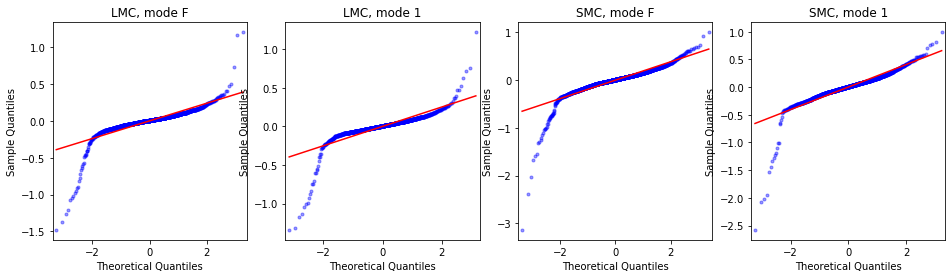

In [74]:
fig,axs = plt.subplots(1, 4, figsize=(16, 4))


for i in range(4):

    sm.qqplot(res[i], line='r', ax=axs[i], marker=".", alpha=0.4,\
              label='data points')
    
    axs[i].set_title(titles[i])


By plotting out the residues in a Q-Q plot, we can tell that these residuals do not look like a normal distribution. The majority of the rediduals are normal but there are some extreme values at the faint and bright end. These unnormal residuals might due to selection effect.

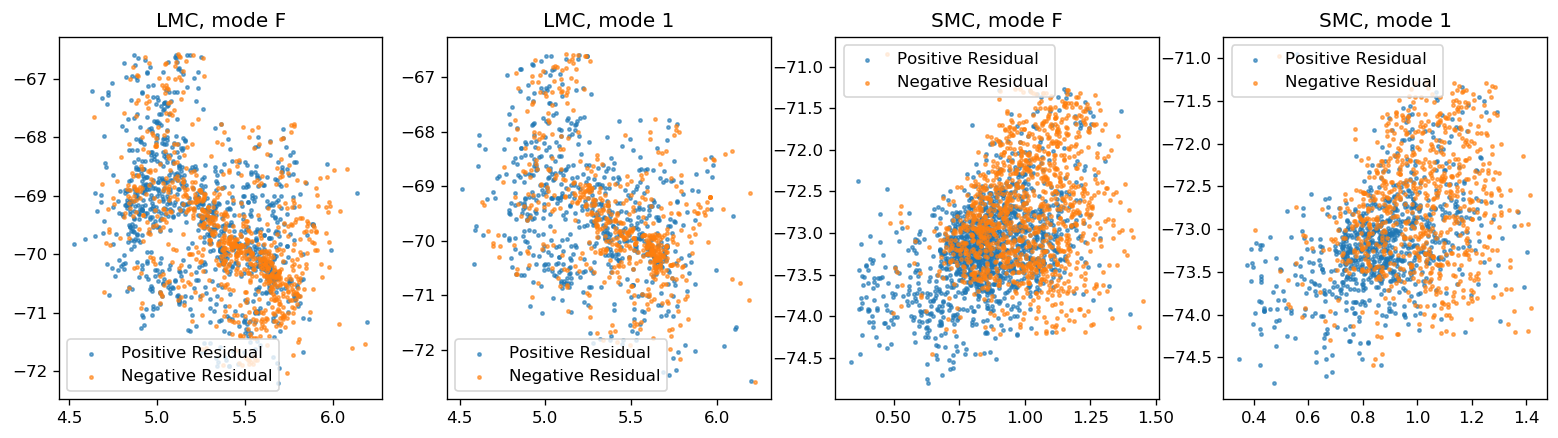

In [91]:
fig,axs = plt.subplots(1, 4, figsize=(16, 4), dpi=120)


for i in range(4):
    da = data_list[i]    
    
    da_p = da[res[i]>=0]
    da_n = da[res[i]<0]
    
    axs[i].scatter(da_p['RA0'], da_p['Decl0'], marker='.', s=15, alpha=0.6,\
                  linewidths=None, label='Positive Residual')
    axs[i].scatter(da_n['RA0'], da_n['Decl0'], marker='.', s=15, alpha=0.6,\
                  linewidths=None, label='Negative Residual')
    
    axs[i].legend()
    axs[i].set_title(titles[i])
    

From the plot we can see that there is an correlation between the residual and the location of the Cepheids in both LMC and SMC.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


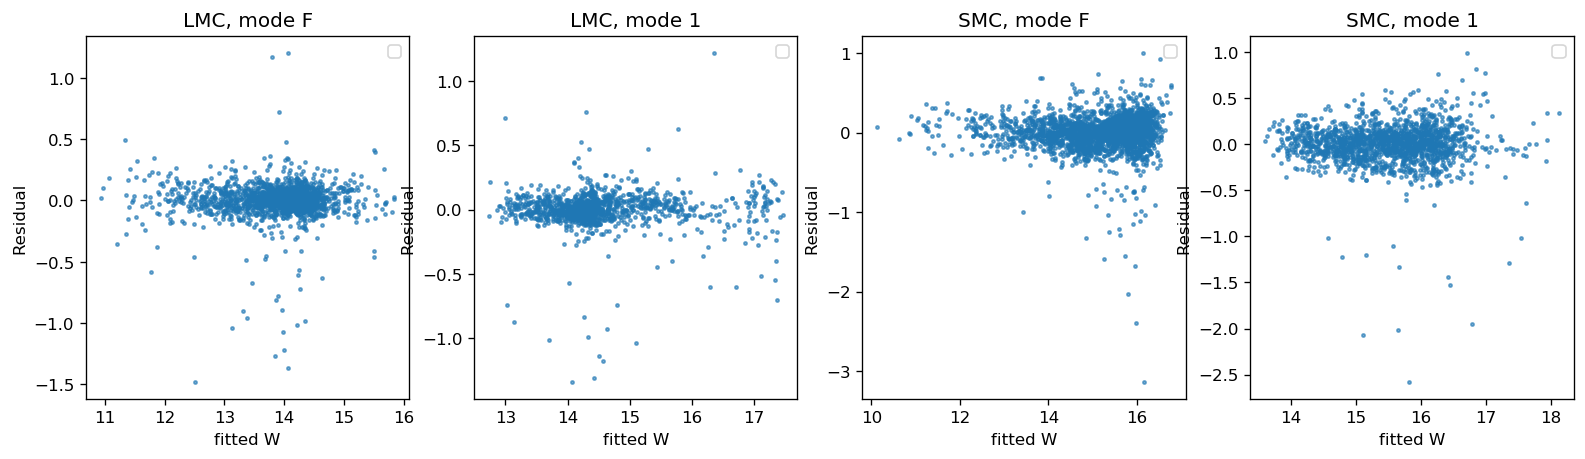

In [99]:
fig,axs = plt.subplots(1, 4, figsize=(16, 4), dpi=120)


for i in range(4):
    da = data_list[i]    
    pfunc = np.poly1d(polys[i])
    
    axs[i].scatter(pfunc(da['logP1']), res[i], marker='.', s=15, alpha=0.6)

    axs[i].set_xlabel('fitted W')
    axs[i].set_ylabel('Residual')
    
    axs[i].legend()
    axs[i].set_title(titles[i])

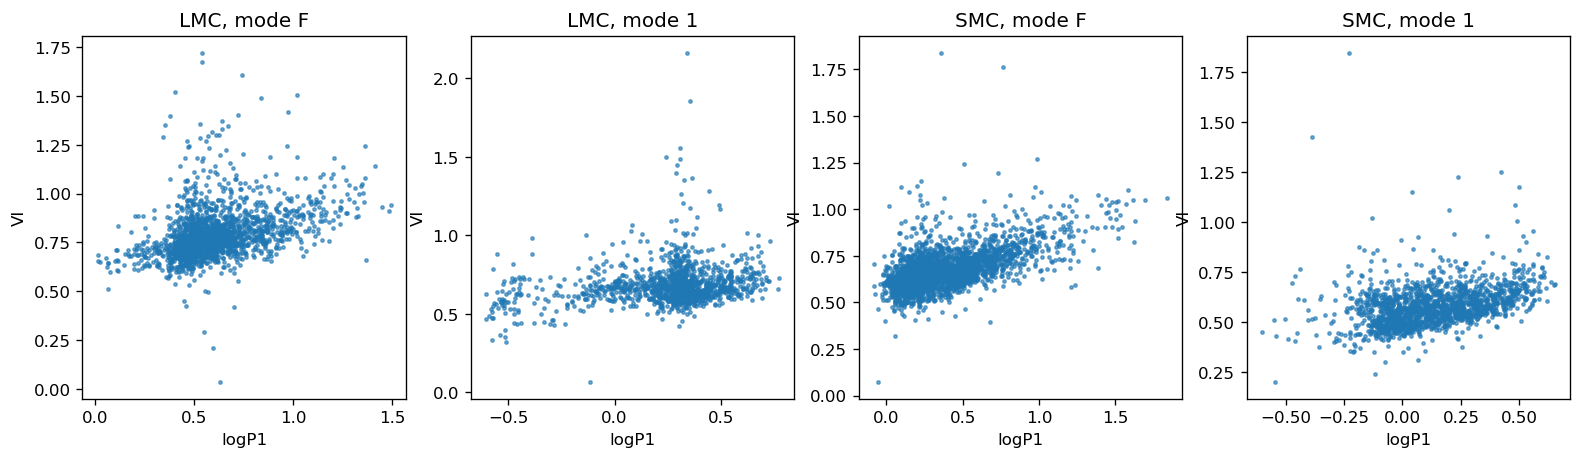

In [101]:
fig,axs = plt.subplots(1, 4, figsize=(16, 4), dpi=120)


for i in range(4):
    da = data_list[i]    

    axs[i].scatter(da['logP1'], da['VI'], marker='.', s=15, alpha=0.6)

    axs[i].set_xlabel('logP1')
    axs[i].set_ylabel('VI')
    
    axs[i].set_title(titles[i])

From the two plots above, we can see that there isn't a correlation between fitted W and the residue but there is some correlation between period and V-I color.